# Stock Market Prediction using stacked LSTM

###### Using Keras and Tensorflow 

In [1]:
!pip install pandas_datareader   
!pip install tiingo


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
### Data Collection 
import os
import pandas_datareader as pdr

In [2]:
from tiingo import TiingoClient
import pandas as pd
#client = TiingoClient()
config = {}
config['session'] = True
config['api_key'] = "4ca09c1b369fcca3cb8334f6f39abee3c0b8531a"
client = TiingoClient(config)

In [3]:
vg_metadata=client.get_ticker_metadata("MS")

In [4]:
print(vg_metadata)

{'ticker': 'MS', 'name': 'Morgan Stanley', 'description': 'Morgan Stanley is a leading global financial services firm providing a wide range of investment banking, securities, wealth management and investment management services. With offices in 41 countries, the Firm’s employees serve clients worldwide including corporations, governments, institutions and individuals.', 'startDate': '1993-02-23', 'endDate': '2023-04-21', 'exchangeCode': 'NYSE'}


In [5]:
definitions = client.get_fundamentals_definitions('MS')

In [6]:
print(definitions)

[{'dataCode': 'rps', 'name': 'Revenue Per Share', 'description': 'Revenue per share', 'statementType': 'overview', 'units': '$'}, {'dataCode': 'roa', 'name': 'Return on Assets ROA', 'description': 'Net Income/Total Assets', 'statementType': 'overview', 'units': '%'}, {'dataCode': 'assetTurnover', 'name': 'Asset Turnover', 'description': 'Revenue over assets', 'statementType': 'overview', 'units': None}, {'dataCode': 'bookVal', 'name': 'Book Value', 'description': 'Book value of the share, assets - liabilities', 'statementType': 'overview', 'units': '$'}, {'dataCode': 'bvps', 'name': 'Book Value Per Share', 'description': 'Book Value per each share', 'statementType': 'overview', 'units': '$'}, {'dataCode': 'revenue', 'name': 'Revenue', 'description': 'Revenue', 'statementType': 'incomeStatement', 'units': '$'}, {'dataCode': 'epsDil', 'name': 'Earnings Per Share Diluted', 'description': 'EPS for diluted shares', 'statementType': 'incomeStatement', 'units': '$'}, {'dataCode': 'netinc', 'n

In [7]:
df = client.get_dataframe("MS",
                                     frequency = 'daily',
                                     startDate='2019-01-01',
                                     endDate='2023-03-01')

In [8]:
print(df)

                           close    high    low   open    volume   adjClose   
date                                                                          
2019-01-02 00:00:00+00:00  40.40  40.720  38.76  39.02  10648013  35.720795  \
2019-01-03 00:00:00+00:00  39.68  40.220  39.25  40.22  13034509  35.084187   
2019-01-04 00:00:00+00:00  41.30  41.580  40.28  40.50  14371614  36.516555   
2019-01-07 00:00:00+00:00  41.71  42.160  40.98  41.51  11812629  36.879068   
2019-01-08 00:00:00+00:00  41.45  42.410  41.08  42.30  11398177  36.649182   
...                          ...     ...    ...    ...       ...        ...   
2023-02-23 00:00:00+00:00  97.94  98.420  96.70  97.88   5916140  97.940000   
2023-02-24 00:00:00+00:00  97.70  97.980  96.61  97.15   5414234  97.700000   
2023-02-27 00:00:00+00:00  96.70  98.475  96.58  98.41   5644988  96.700000   
2023-02-28 00:00:00+00:00  96.50  97.290  96.26  97.12   6745415  96.500000   
2023-03-01 00:00:00+00:00  96.19  96.760  95.26  95.

In [9]:
df.to_csv('MS.csv')

In [10]:
df1 = client.get_dataframe("JPM",
                                     frequency = 'daily',
                                     startDate='2019-01-01',
                                     endDate='2023-01-01')

In [11]:
df1.to_csv('JPM.csv')

In [12]:
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2019-01-02 00:00:00+00:00,40.40,40.72,38.76,39.02,10648013,35.720795,36.003732,34.270743,34.500629,10648013,0.0,1.0
2019-01-03 00:00:00+00:00,39.68,40.22,39.25,40.22,13034509,35.084187,35.561643,34.703990,35.561643,13034509,0.0,1.0
2019-01-04 00:00:00+00:00,41.30,41.58,40.28,40.50,14371614,36.516555,36.764125,35.614693,35.809213,14371614,0.0,1.0
2019-01-07 00:00:00+00:00,41.71,42.16,40.98,41.51,11812629,36.879068,37.276948,36.233618,36.702232,11812629,0.0,1.0
2019-01-08 00:00:00+00:00,41.45,42.41,41.08,42.30,11398177,36.649182,37.497993,36.322036,37.400733,11398177,0.0,1.0


In [13]:
df.shape

(1048, 12)

In [14]:
close_MS=client.get_dataframe('MS',
                             frequency='daily',
                             metric_name='close',
                             startDate='2019-01-01',
                             endDate='2023-01-01')

In [15]:
close_MS.to_csv('close_MS.csv')

In [16]:
close_JPM=client.get_dataframe('JPM',
                             frequency='daily',
                             metric_name='close',
                             startDate='2019-01-01',
                             endDate='2023-01-01')

In [17]:
close_JPM.to_csv('close_JPM.csv')

In [18]:
close_JPM

date
2019-01-02 00:00:00+00:00     99.31
2019-01-03 00:00:00+00:00     97.11
2019-01-04 00:00:00+00:00    100.69
2019-01-07 00:00:00+00:00    100.76
2019-01-08 00:00:00+00:00    100.57
                              ...  
2022-12-23 00:00:00+00:00    131.28
2022-12-27 00:00:00+00:00    131.74
2022-12-28 00:00:00+00:00    132.46
2022-12-29 00:00:00+00:00    133.22
2022-12-30 00:00:00+00:00    134.10
Name: close, Length: 1008, dtype: float64

In [19]:
import matplotlib.pyplot as plt

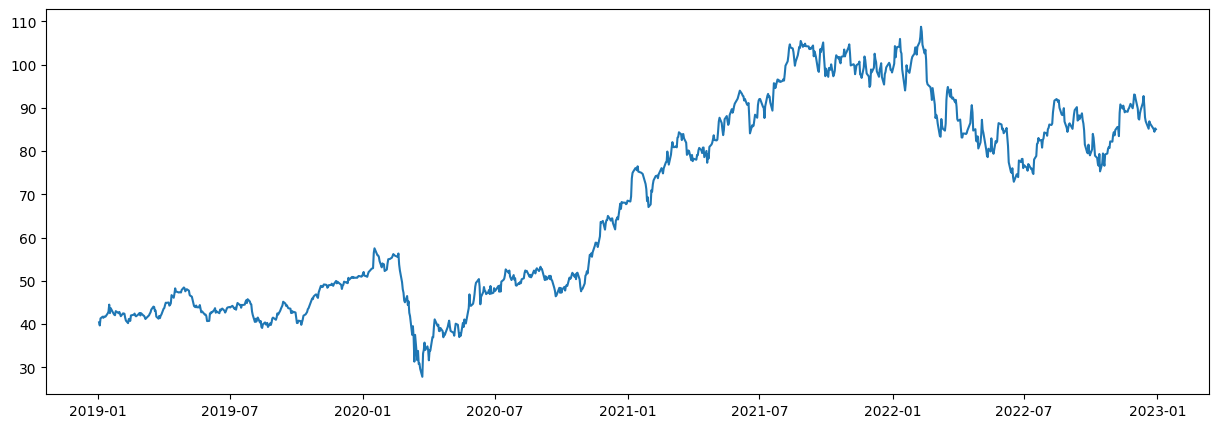

In [20]:
#import seaborn
#plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(close_MS)

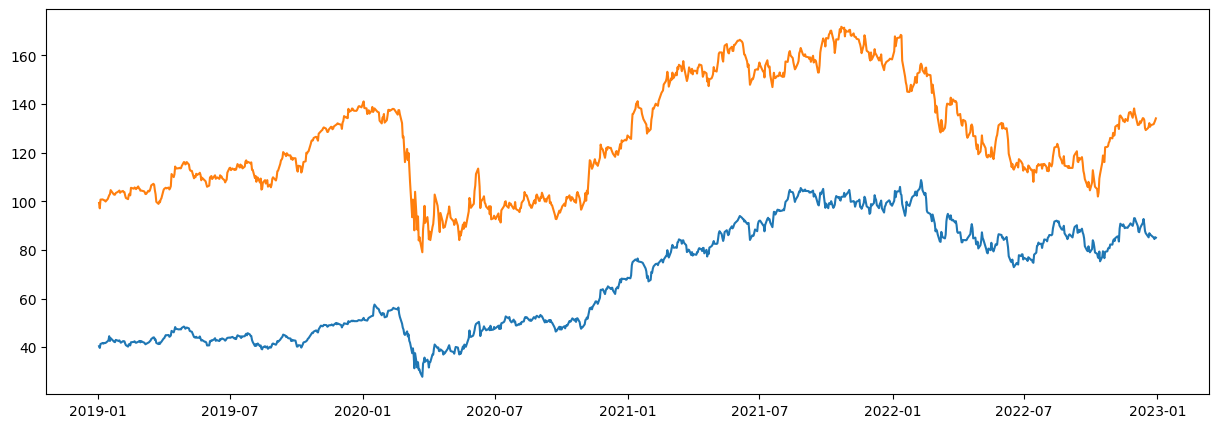

In [21]:
# Stock prices compared
plt.figure(figsize=(15,5))
plt.plot(close_MS)
plt.plot(close_JPM)

In [22]:
### LSTM are sensitive to the scale of data. so we apply MinMax scaler

In [23]:
import numpy as np

In [24]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import sklearn
from sklearn import preprocessing

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
## Before converting the values to array betweeen 0 to 1
close_MS

date
2019-01-02 00:00:00+00:00    40.40
2019-01-03 00:00:00+00:00    39.68
2019-01-04 00:00:00+00:00    41.30
2019-01-07 00:00:00+00:00    41.71
2019-01-08 00:00:00+00:00    41.45
                             ...  
2022-12-23 00:00:00+00:00    86.11
2022-12-27 00:00:00+00:00    85.06
2022-12-28 00:00:00+00:00    84.46
2022-12-29 00:00:00+00:00    85.24
2022-12-30 00:00:00+00:00    85.02
Name: close, Length: 1008, dtype: float64

In [28]:
scaler = MinMaxScaler()
close_MS=scaler.fit_transform(np.array(close_MS).reshape(-1,1))

In [29]:
## Now values will be between zero to one
close_MS

array([[0.15558576],
       [0.14668809],
       [0.16670786],
       ...,
       [0.70007415],
       [0.7097133 ],
       [0.70699456]])

In [30]:
 ##splitting dataset into train and test split
training_size=int(len(close_MS)*0.65)
test_size=len(close_MS)-training_size
train_data, test_data=close_MS[0:training_size,:],close_MS[training_size:len(close_MS),:1]

In [31]:
training_size,test_size

(655, 353)

In [32]:
len(train_data)

655

In [33]:
### Explain well train data set from video
#convert an array of values into a datest matrix
def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0,1,2,3...100 as timestep=100 in xtrain in ytrain - 100,...
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [34]:
#reshape into X=t, t+1, t+2. t+3 and Y=t+4
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape)
print(y_train.shape) 

(554, 100)
(554,)


In [ ]:
## As we can see there is only one element in y train

In [36]:
print(X_test.shape)
print(ytest.shape)

(252, 100)
(252,)


In [34]:
print(ytest)

[0.96527435 0.92980722 0.92362827 0.87827484 0.81809194 0.8393475
 0.89001483 0.87802768 0.86838853 0.8802521  0.89421651 0.90632724
 0.91435986 0.9235047  0.94092931 0.94055858 0.92041522 0.94290657
 0.95612951 0.97058824 1.         0.98566485 0.9485912  0.92387543
 0.93450321 0.90632724 0.84453782 0.83551656 0.82723678 0.81240732
 0.7909046  0.8247652  0.77768166 0.73924864 0.74851705 0.74110232
 0.72355413 0.68759268 0.68586258 0.73640633 0.71737519 0.70897182
 0.7032872  0.72318339 0.7902867  0.81623826 0.82810183 0.8007909
 0.8206871  0.79794859 0.79485912 0.79794859 0.78423134 0.79127533
 0.77187346 0.73640633 0.73133959 0.73492338 0.71020761 0.68363816
 0.68363816 0.69513099 0.69463668 0.69352447 0.69599605 0.70378151
 0.72503707 0.75506673 0.77607514 0.75506673 0.70353435 0.7073653
 0.67424617 0.67226891 0.68697479 0.65224913 0.66917944 0.69130005
 0.73418191 0.70600593 0.69723183 0.65916955 0.64817103 0.63124073
 0.62753337 0.65163124 0.64372219 0.68116658 0.65348492 0.6444636

In [37]:
#Always reshape x train before LSTM to convert the whole shape into 3d
#reshape input to be [samples, time steps, features] which is required for LSTM 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1) ## last two values will be the input for lstm (1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [38]:

!pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
## Using a sequential model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) ## first input value should be X_train (1)
## One lstm after another staceked lstm
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
## fitting this data onto x train and y train and validation data
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 7s 291ms/step - loss: 0.0975 - val_loss: 0.0395
Epoch 2/100
9/9 [==============================] - 1s 137ms/step - loss: 0.0179 - val_loss: 0.0566
Epoch 3/100
9/9 [==============================] - 1s 127ms/step - loss: 0.0097 - val_loss: 0.0118
Epoch 4/100
9/9 [==============================] - 1s 128ms/step - loss: 0.0054 - val_loss: 0.0074
Epoch 5/100
9/9 [==============================] - 1s 123ms/step - loss: 0.0034 - val_loss: 0.0078
Epoch 6/100
9/9 [==============================] - 1s 120ms/step - loss: 0.0025 - val_loss: 0.0077
Epoch 7/100
9/9 [==============================] - 1s 123ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 8/100
9/9 [==============================] - 1s 130ms/step - loss: 0.0023 - val_loss: 0.0057
Epoch 9/100
9/9 [==============================] - 1s 132ms/step - loss: 0.0023 - val_loss: 0.0056
Epoch 10/100
9/9 [==============================] - 1s 130ms/step - loss: 0.0022 - val_loss: 0.0065
Epoch 11/

9/9 [==============================] - 1s 116ms/step - loss: 8.0966e-04 - val_loss: 0.0018
Epoch 83/100
9/9 [==============================] - 1s 123ms/step - loss: 8.2498e-04 - val_loss: 0.0020
Epoch 84/100
9/9 [==============================] - 1s 117ms/step - loss: 7.7213e-04 - val_loss: 0.0029
Epoch 85/100
9/9 [==============================] - 1s 115ms/step - loss: 7.0814e-04 - val_loss: 0.0017
Epoch 86/100
9/9 [==============================] - 1s 115ms/step - loss: 6.8915e-04 - val_loss: 0.0016
Epoch 87/100
9/9 [==============================] - 1s 114ms/step - loss: 6.9630e-04 - val_loss: 0.0017
Epoch 88/100
9/9 [==============================] - 1s 114ms/step - loss: 6.8967e-04 - val_loss: 0.0022
Epoch 89/100
9/9 [==============================] - 1s 116ms/step - loss: 6.5609e-04 - val_loss: 0.0016
Epoch 90/100
9/9 [==============================] - 1s 114ms/step - loss: 6.9511e-04 - val_loss: 0.0015
Epoch 91/100
9/9 [==============================] - 1s 115ms/step - loss: 7.5

In [44]:
import tensorflow as tf

In [45]:
###Prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 20ms/step


In [46]:
### Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [47]:
### Calculate RMSE performance metrics 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) ##train predict is output for train dataset
#rmse calculated is for training dataset

59.12401755787029

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

87.74896230726821

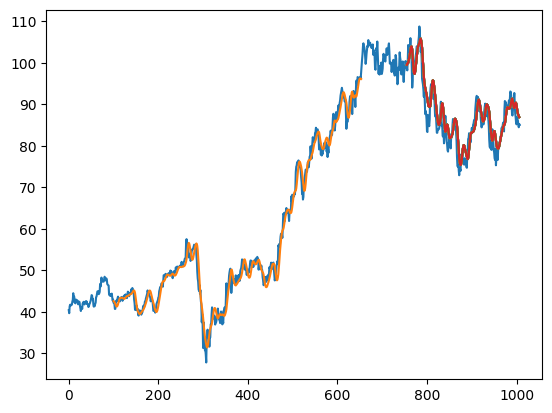

In [54]:
### Plotting 
# shift train predictions for plotting
import numpy 
step=100 
trainPredictPlot = numpy.empty_like(close_MS) ## nan values taken based on the size of close_MS
trainPredictPlot[:, :] = np.nan  ##nan values? 
trainPredictPlot[step:len(train_predict)+step, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(step*2)+1:len(close_MS)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close_MS))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
## red is test predict which we predicted as compared to original graph

In [55]:
len(test_data)

353

In [56]:
## Taking previous 30 day data
x_input=test_data[253:].reshape(1,-1) ##Taking previous 100 days hence 253
x_input.shape

(1, 100)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.7548195748887792,
 0.7710084033613447,
 0.7890509144834403,
 0.7934997528423133,
 0.7910281759762727,
 0.7852199703410776,
 0.7899159663865547,
 0.7686604053386061,
 0.7495056846267918,
 0.7475284231339594,
 0.7512357884330203,
 0.7674246169055858,
 0.7291151754819576,
 0.7110726643598615,
 0.6997034107760751,
 0.7094661393969353,
 0.7212061295106278,
 0.7240484429065746,
 0.708353929807217,
 0.7297330696984676,
 0.7492585269401879,
 0.7618635689569946,
 0.7703905091448344,
 0.7320810677212062,
 0.7336875926841326,
 0.7470341077607514,
 0.7367770637666833,
 0.7527187345526445,
 0.7338111715274345,
 0.7235541275333663,
 0.703905091448344,
 0.6636183885318834,
 0.6419920909540286,
 0.6385318833415718,
 0.6631240731586752,
 0.643227879387049,
 0.6327236777063767,
 0.6496539792387541,
 0.6940187839841818,
 0.6833910034602075,
 0.6611468116658428,
 0.6317350469599605,
 0.6253089471082549,
 0.6078843302026693,
 0.6029411764705881,
 0.6365546218487395,
 0.5868759268413246,
 0.6096144340088

In [59]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7275605]
101
1 day input [0.7710084  0.78905091 0.79349975 0.79102818 0.78521997 0.78991597
 0.76866041 0.74950568 0.74752842 0.75123579 0.76742462 0.72911518
 0.71107266 0.69970341 0.70946614 0.72120613 0.72404844 0.70835393
 0.72973307 0.74925853 0.76186357 0.77039051 0.73208107 0.73368759
 0.74703411 0.73677706 0.75271873 0.73381117 0.72355413 0.70390509
 0.66361839 0.64199209 0.63853188 0.66312407 0.64322788 0.63272368
 0.64965398 0.69401878 0.683391   0.66114681 0.63173505 0.62530895
 0.60788433 0.60294118 0.63655462 0.58687593 0.60961443 0.63803757
 0.61579338 0.60294118 0.63531883 0.63791399 0.6512605  0.65620366
 0.65348492 0.67239249 0.67177459 0.69092931 0.69896194 0.68969352
 0.70489372 0.7137914  0.71020761 0.68759268 0.75370737 0.77817598
 0.76618883 0.77471577 0.76631241 0.75556105 0.75865052 0.75716757
 0.76445872 0.76767177 0.7797825  0.76717746 0.78188334 0.80647553
 0.80561048 0.79448838 0.76618883 0.73776569 0.73492338 0.752348
 0.76198715 0.78237766 0.80202669 0.

10 day output [[0.7737643]]
11 day input [0.76742462 0.72911518 0.71107266 0.69970341 0.70946614 0.72120613
 0.72404844 0.70835393 0.72973307 0.74925853 0.76186357 0.77039051
 0.73208107 0.73368759 0.74703411 0.73677706 0.75271873 0.73381117
 0.72355413 0.70390509 0.66361839 0.64199209 0.63853188 0.66312407
 0.64322788 0.63272368 0.64965398 0.69401878 0.683391   0.66114681
 0.63173505 0.62530895 0.60788433 0.60294118 0.63655462 0.58687593
 0.60961443 0.63803757 0.61579338 0.60294118 0.63531883 0.63791399
 0.6512605  0.65620366 0.65348492 0.67239249 0.67177459 0.69092931
 0.69896194 0.68969352 0.70489372 0.7137914  0.71020761 0.68759268
 0.75370737 0.77817598 0.76618883 0.77471577 0.76631241 0.75556105
 0.75865052 0.75716757 0.76445872 0.76767177 0.7797825  0.76717746
 0.78188334 0.80647553 0.80561048 0.79448838 0.76618883 0.73776569
 0.73492338 0.752348   0.76198715 0.78237766 0.80202669 0.77471577
 0.7412259  0.72973307 0.71354424 0.70872467 0.72985665 0.72367771
 0.72046466 0.7074888

21 day output [[0.779534]]
22 day input [0.77039051 0.73208107 0.73368759 0.74703411 0.73677706 0.75271873
 0.73381117 0.72355413 0.70390509 0.66361839 0.64199209 0.63853188
 0.66312407 0.64322788 0.63272368 0.64965398 0.69401878 0.683391
 0.66114681 0.63173505 0.62530895 0.60788433 0.60294118 0.63655462
 0.58687593 0.60961443 0.63803757 0.61579338 0.60294118 0.63531883
 0.63791399 0.6512605  0.65620366 0.65348492 0.67239249 0.67177459
 0.69092931 0.69896194 0.68969352 0.70489372 0.7137914  0.71020761
 0.68759268 0.75370737 0.77817598 0.76618883 0.77471577 0.76631241
 0.75556105 0.75865052 0.75716757 0.76445872 0.76767177 0.7797825
 0.76717746 0.78188334 0.80647553 0.80561048 0.79448838 0.76618883
 0.73776569 0.73492338 0.752348   0.76198715 0.78237766 0.80202669
 0.77471577 0.7412259  0.72973307 0.71354424 0.70872467 0.72985665
 0.72367771 0.72046466 0.70748888 0.70007415 0.7097133  0.70699456
 0.72756052 0.72940212 0.73337722 0.73871434 0.74470365 0.75079811
 0.75662118 0.7619341  0.

29 day output [[0.78827125]]
[[0.7275605201721191], [0.7294021248817444], [0.73337721824646], [0.738714337348938], [0.7447036504745483], [0.7507981061935425], [0.7566211819648743], [0.7619341015815735], [0.7665993571281433], [0.7705488801002502], [0.7737643122673035], [0.7762643098831177], [0.7780959606170654], [0.7793300747871399], [0.7800552248954773], [0.7803719639778137], [0.7803876996040344], [0.7802121043205261], [0.7799490690231323], [0.7796952724456787], [0.7795339822769165], [0.7795339822769165], [0.779747724533081], [0.7802102565765381], [0.7809401750564575], [0.781940221786499], [0.7831998467445374], [0.7846971154212952], [0.7864002585411072], [0.7882712483406067]]


In [60]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [61]:
import matplotlib.pyplot as plt

In [62]:
len(close_MS)

1008

In [63]:
df3=close_MS.tolist()
df3.extend(lst_output)

In [64]:
g = scaler.inverse_transform(lst_output)

In [65]:
h = scaler.inverse_transform(close_MS[908:]) ## 908 because we have taken previous 100 days days data and len is 1008
## we have taken the 100 days data as original data for prediction so we want that data to be depicted after 908 values to complete 1008 values

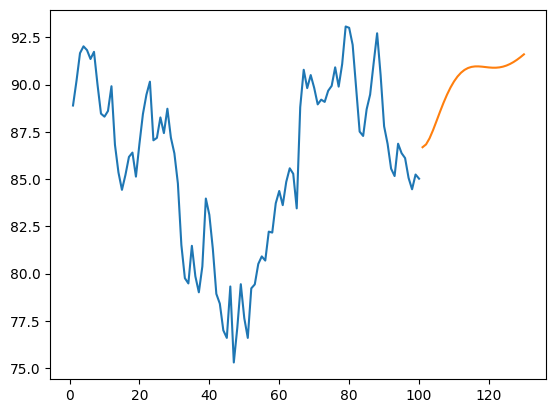

In [66]:
plt.plot(day_new,h)
plt.plot(day_pred,g)

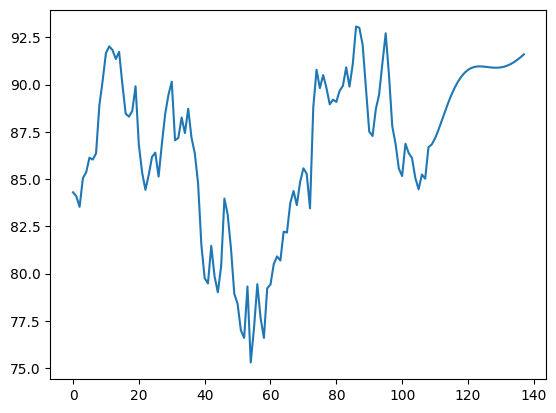

In [71]:
plt.plot(df3[900:])

In [68]:
df3=scaler.inverse_transform(df3).tolist()

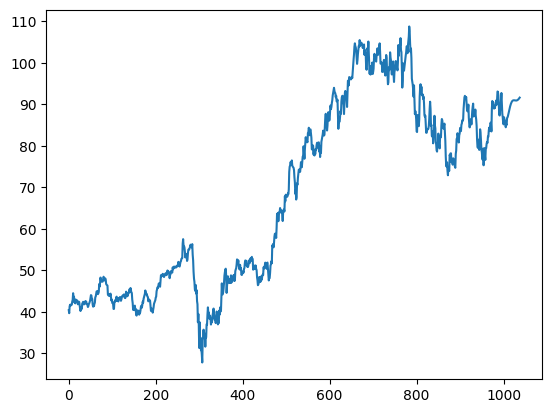

In [72]:
plt.plot(df3)